# Your info

Full name: mohammad ali farahat

Student ID: 97521423

# Q1. Perceptron

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q1_graded
# Do not change the above line.

class NOR:
    def __init__(self, learning_rate, n):
        self.input_dim = n 
        self.weights = np.random.rand(self.input_dim)
        self.learning_rate = learning_rate
        self.max_change = 100

    def learn(self,learning_input, learning_answer):
        y = np.dot(learning_input, self.weights)
        error = learning_answer - y
        # print("error: ",error)
        # print("weight before: ",self.weights)


        # Update weight for each edge & Find Largest weight change
        change = -1
        for i in range(self.input_dim):
            new_weight = self.weights[i] + (self.learning_rate*error*learning_input[i])
            if (abs(new_weight - self.weights[i]) > change ):
                change = abs(new_weight - self.weights[i])
            self.weights[i] = new_weight
        
        # decrease learning rate to avoid infinite loop
        self.learning_rate = self.learning_rate *0.999

        
        # print("learning rate: ",self.learning_rate)
        # print("max_change : ",self.max_change)
        self.max_change = change

        # print("weight after: ",self.weights)


# This cell is for your codes.

In [ ]:
# Q1_graded
# Do not change the above line.

nor = NOR(0.1, 3)
limit = 0.000000001
x = 0
while(nor.max_change > limit):
    x += 1
    # print("************************")
    # print("[-1, -1] ==> 1")
    nor.learn(np.array([1,-1,-1]), 1)
    # print("************************")
    # print("[-1, 1] ==> -1")
    nor.learn(np.array([1,-1,1]), -1)
    # print("************************")
    # print("[1, -1] ==> -1")
    nor.learn(np.array([1,1,-1]), -1)
    # print("************************")
    # print("[1, 1] ==> -1")
    nor.learn(np.array([1,1,1]), -1)

print("iterations: ", x)
print("final weights: ",nor.weights)
# This cell is for your codes.

iterations:  4430
final weights:  [-0.5 -0.5 -0.5]


# Q2. Binary Classification

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q2_graded
# Do not change the above line.

class Perceptron:
    def __init__(self, learning_rate, n):
        self.input_dim = n 
        self.weights = np.random.rand(self.input_dim)
        self.learning_rate = learning_rate
        self.max_change = 100
        self.mis = 0

    def Calculate_Weights_Average(self):
        average = 0
        for i in range(self.input_dim):
            average += self.weights[i]
        average /= self.input_dim
        return average
    
    # Activation function
    def Is_active(self, y, label):
        if (((y <= 0) and (label > 0)) or ((y > 0) and (label < 0))):
            return True
        return False

    def learn(self,learning_input, learning_answer):

        # calculate dots of input training data and current weights
        y = np.dot(learning_input, self.weights)
        
        # Check answer is true or not & calculate mistakes
       
        if (not self.Is_active(y, learning_answer)):
            self.mis += 1
        
        # Update weight for each edge & Find Largest weight change
        error = learning_answer - y
        change = -1
        for i in range(self.input_dim):
            new_weight = self.weights[i] + (self.learning_rate*error*learning_input[i])
            if (abs(new_weight - self.weights[i]) > change ):
                change = abs(new_weight - self.weights[i])
            self.weights[i] = new_weight

        self.max_change = change
        
        
        # Calculate Average of Weights to avoid large numbers
        average = self.Calculate_Weights_Average()
        if ( average != 0 ):
            self.weights /= average/1000
        

        # decrease learning rate to avoid infinite loop
        self.learning_rate = self.learning_rate *0.9999
      

# This cell is for your codes.

iterations:  1182
final weights:  [2996.94229666   10.94871997   -7.89101663]


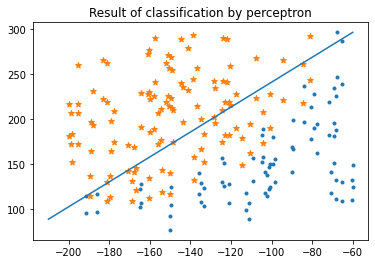

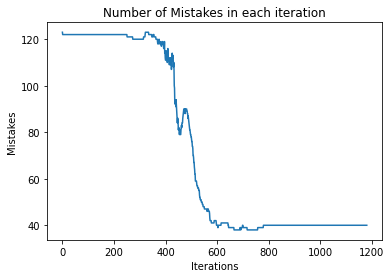

In [ ]:
# Q2_graded
# Do not change the above line.

# open and read data file
data_file = "/content/data.txt"
data = open(data_file, "r")
FileContentLines = data.readlines()

# initialize our perceptron
BC = Perceptron(0.2, 3)

# parse data and fill lists for later uses
points_zero_x = []
points_zero_y = []
points_one_x = []
points_one_y = []

all_points = []
labels = []

mistakes = [] 

for line in FileContentLines:
    toks = line.split(',')
    if(float(toks[2]) == 0):
        toks[2] = "-1"
        points_zero_x.append(float(toks[0]))
        points_zero_y.append(float(toks[1]))
    else:
        points_one_x.append(float(toks[0]))
        points_one_y.append(float(toks[1]))

    all_points.append([1, float(toks[0]), float(toks[1])])
    labels.append(float(toks[2]))


# start training with input data until largest weight change becomes less than limit & 
# count number of mistakes in each iteration
limit = 0.000001
iter = 0
while (BC.max_change > limit):
    for i in range(len(all_points)):
        BC.learn(all_points[i], labels[i])
    iter += 1
    mistakes.append(BC.mis)
    BC.mis = 0
    # print(BC.weights)


# print number of iterations and final weights
print("iterations: ", iter)
print("final weights: ",BC.weights)


# plotting the Points and final Separator Line
plt.scatter(points_zero_x, points_zero_y,marker='.')
plt.scatter(points_one_x, points_one_y,marker='*')
x = np.linspace(-210, -60, 400)
t = BC.weights
Y = -1*(((t[1]/t[2])*x) + (t[0]/t[2]))
plt.plot(x, Y,linestyle='solid')
plt.title('Result of classification by perceptron')
plt.show()

print()
# plotting mistakes in each iteration 
plt.plot(mistakes)
plt.xlabel('Iterations')
plt.ylabel('Mistakes')
plt.title('Number of Mistakes in each iteration')
plt.show()

# This cell is for your codes.

# Q4. MLP

In [1]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.
import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 85)                66725     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                860       
Total params: 67,585
Trainable params: 67,585
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.6874 - acc: 0.8078 - val_loss: 0.2080 - val_acc: 0.9420
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1919 - acc: 0.9450 - val_loss: 0.1531 - val_acc: 0.9555
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1423 - acc: 0.9586 - val_loss: 0.1293 - val_acc: 0.9620
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1067 - acc: 0.9696 - val_loss:

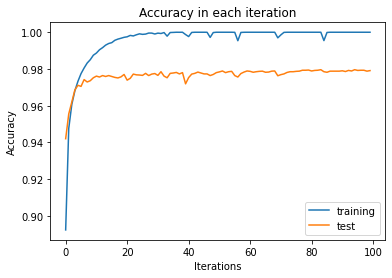

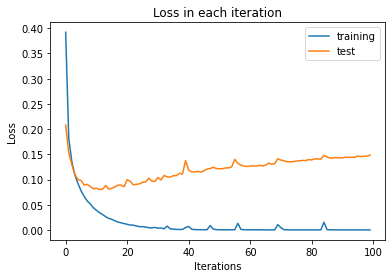

In [14]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape inputs and labels to fit in mlp
x_train = x_train.reshape(60000,784).astype('float32')
x_test = X.reshape(10000,784).astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# normilize 
x_train = x_train / 255.0
x_test = x_test / 255.0
# create model and layeres
model = Sequential()
model.add(Dense(85, input_shape=(784,), activation='relu'))
# model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile and optimize model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

# train the model 
result = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test)) 

##plotting the results 
# accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy in each iteration')
plt.legend(["training", "test"])
plt.show()

#loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss in each iteration')
plt.legend(["training", "test"])
plt.show()

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# Q5. Back-Propagation

In [33]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

import numpy as np
import matplotlib.pyplot as plt


In [54]:
# Q5_graded
# Do not change the above line.
class MLP():
    def __init__(self, input_layer=2, hidden_layer1=2, output_layer=2, etha=0.5):
        # initialize properties
        self.l1 = input_layer
        self.l2 = hidden_layer1
        self.l3 = output_layer

        self.w1 = np.random.rand(hidden_layer1, input_layer) 
        self.b1 = np.zeros((hidden_layer1, 1))
        self.w2 = np.random.rand(output_layer, hidden_layer1) 
        self.b2 = np.zeros((output_layer, 1))

        self.input = []
        self.Y = []
        
        self.net1 = []
        self.out1 = []
        self.net2 = []
        self.out2 = []

        self.err = np.zeros((output_layer,1))
        self.etha = etha

    def softmax(self, inputs):
        inputs = inputs - np.max(inputs, axis=0, keepdims=True)
        n = np.exp(inputs)
        result = n / np.sum(n, axis=0, keepdims=True)
        return result  
       
    def forward(self, input):
        # save inputs this class properties
        self.input = np.copy(input)
        
        # calculate net for hidden layer
        self.net1 = np.dot(self.w1, input) + self.b1

        ## activataion function for calculate out1
        self.out1 = 1/(1+np.exp(-self.net1)) # sigmoid
        # self.out1 = np.maximum(0,self.net1) # relu

        # calculate net for output layer
        self.net2 = np.dot(self.w2, self.out1) + self.b2

        ## activataion function for calculate out2
        self.out2 = self.softmax(self.net2) # softmax
        # self.out2 = np.maximum(0,self.net2) # relu
        # self.out2 = 1/(1+np.exp(-self.net2)) # sigmoid

        return self.out2


    def Backward(self, target):
        # save target to this class 
        self.Y = target

        # calculate error 
        self.err = np.multiply(np.subtract(self.Y, self.out2), np.subtract(self.Y, self.out2)) * 0.5
       
        # calculate gradient for first layer back
        t1 = np.subtract(self.out2, self.Y)
        t2 = np.multiply(self.out2, np.subtract(1, self.out2))
        a = np.multiply(t1, t2)
        wtf = np.dot(a,self.out1.T)
        changes = wtf * self.etha

        # calculate new w2
        w2_n = np.subtract(self.w2, changes)

        # update bios first layer back
        self.b2 = np.subtract(self.b2, a * self.etha)


        # calculate gradient for second layer back
        x1 = np.dot(self.w2.T, a)
        x2 = np.multiply(self.out1, np.subtract(1, self.out1))
        a2 = np.multiply(x1, x2)
        wtf2 = np.dot(a2, self.input.T) 
        changes2 = wtf2 * self.etha

        # calculate new w1 and update it
        self.w1 = np.subtract(self.w1, changes2)

        # update w2 
        self.w2 = w2_n

        # update bios second layer back
        self.b1 = np.subtract(self.b1, a2 * self.etha)


    def train(self, input, label):
        # fit the data
        acc = self.forward(input)
        self.Backward(label)

        # calculate loss 
        loss = np.sum(self.err)

        return np.argmax(acc), loss


    def predict(self, input):
        out = self.forward(input)
        return np.argmax(out)

if __name__=='__main__':

    # open and read mnist database
    mnist_file = open("./sample_data/mnist_train_small.csv", "r")
    lines = mnist_file.readlines()
    mnist_test_file = open("/content/sample_data/mnist_test.csv", "r")
    lines_test = mnist_test_file.readlines()
 
    # create MLP object
    nn = MLP(784,85,10,0.3)    
    r = 0
    for x in range(20):
        r += 1
        print(r,end=" --> ")
        i = 0   
        total_loss = 0
        t=0
        f=0 
        for line in lines:
            # parse and normalize input 
            y_train = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
            # y_train = np.zeros((10,1))
            y_train = y_train.reshape(10,1).astype('float32')
            toks = line.split(",")
            toks = [ int(x) for x in toks]
            y_train[toks[0]] = [0.99]
            x_train = np.array(toks[1:]).reshape(784, 1).astype('float32')
            x_train /= 255
            
            # train mnist
            ans, loss = nn.train(x_train, y_train)
            total_loss += loss
            if (ans == toks[0]):
                t+=1
            else:
                f+=1
            if(i % 1000 == 0):
                # print progress
                print("**",end='')
                
            i += 1
            
        print("  loss:", total_loss/20000, "  acc:", t/(t+f))
        
    # predict tests data
    t=0
    f=0 
    for line in lines_test:
        toks = line.split(",")
        toks = [ int(x) for x in toks]
        x_test = np.array(toks[1:]).reshape(784, 1).astype('float32')  
        x_test /= 255
        x = nn.predict(x_test)
        if ( x == toks[0]):
            t+=1
        else:
            f+=1
    print("tests acc= ", t/(t+f))
    
   



1 --> ****************************************  loss: 0.5424740593780816   acc: 0.0997
2 --> ****************************************  loss: 0.5423615766377766   acc: 0.09965
3 --> ****************************************  loss: 0.5423699597680387   acc: 0.0995
4 --> ****************************************  loss: 0.5423533264957455   acc: 0.0996
5 --> ****************************************  loss: 0.5423726840564175   acc: 0.0995
6 --> ****************************************  loss: 0.5423906508209957   acc: 0.09955
7 --> ****************************************  loss: 0.5423932748744666   acc: 0.09955
8 --> ****************************************  loss: 0.5423818596070799   acc: 0.09955
9 --> ****************************************  loss: 0.5424571373963769   acc: 0.0996
10 --> ****************************************  loss: 0.5423836060948708   acc: 0.09965
11 --> ****************************************  loss: 0.5423664704727614   acc: 0.0996
12 --> *****************************

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.